In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# !pip install lux-api
# import lux

# Funding Data EDA

#### Let us load the dataset

In [2]:
fd = pd.read_csv('fundingdata.csv', encoding='unicode_escape')
# Change format to datetime
fd['Start Date'] = pd.to_datetime(fd['Start Date'])
fd['End Date'] = pd.to_datetime(fd['End Date'])

# Rearrange to ascending order
fd = fd.reindex(index=fd.index[::-1])
fd.reset_index(inplace=True)
fd.drop(columns='index',inplace=True)

## Let's explore the Funding Dataset

In [3]:
fd.head()

,Start Date,End Date,Total Funding Amount(in USD),HF-Startup name,Highest Funding,Total Deals,Undisclosed Deals,Year
0,2016-04-01,2016-09-01,202455000,MakeMyTrip,180000000,25,10,2016
1,2016-11-01,2016-01-16,275510000,Cartrade,145000000,25,13,2016
2,2016-01-18,2016-01-23,170800000,Swiggy,35000000,30,11,2016
3,2016-01-25,2016-01-30,51115000,Power2SME,21000000,22,11,2016
4,2016-01-02,2016-06-02,20983000,ZenDrive,13500000,22,7,2016


In [4]:
fd.shape

(221, 8)

In [5]:
fd.columns

Index(['Start Date', 'End Date', 'Total Funding Amount(in USD)',
       'HF-Startup name', 'Highest Funding', 'Total Deals',
       'Undisclosed Deals', 'Year'],
      dtype='object')

In [6]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Start Date                    221 non-null    datetime64[ns]
 1   End Date                      221 non-null    datetime64[ns]
 2   Total Funding Amount(in USD)  221 non-null    int64         
 3   HF-Startup name               221 non-null    object        
 4   Highest Funding               221 non-null    int64         
 5   Total Deals                   221 non-null    int64         
 6   Undisclosed Deals             221 non-null    int64         
 7   Year                          221 non-null    int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 13.9+ KB


In [7]:
fd.describe()

,Total Funding Amount(in USD),Highest Funding,Total Deals,Undisclosed Deals,Year
count,2.210000e+02,2.210000e+02,221.000000,221.000000,221.000000
mean,1.847310e+08,1.142455e+08,15.488688,4.733032,2017.647059
std,2.903551e+08,2.496804e+08,5.171259,3.089019,1.236694
min,6.970000e+05,3.850000e+05,3.000000,0.000000,2016.000000
25%,4.600000e+07,1.950000e+07,12.000000,3.000000,2017.000000
50%,9.647600e+07,5.000000e+07,15.000000,4.000000,2018.000000
75%,2.090000e+08,1.100000e+08,19.000000,6.000000,2019.000000
max,2.540346e+09,2.500000e+09,31.000000,17.000000,2020.000000


In [8]:
fd.nunique()

Start Date                      221
End Date                        221
Total Funding Amount(in USD)    215
HF-Startup name                 158
Highest Funding                 117
Total Deals                      26
Undisclosed Deals                16
Year                              5
dtype: int64

In [9]:
fd.isnull().sum().sort_values(ascending=False)

Start Date                      0
End Date                        0
Total Funding Amount(in USD)    0
HF-Startup name                 0
Highest Funding                 0
Total Deals                     0
Undisclosed Deals               0
Year                            0
dtype: int64

### Let's explore the funding distribution

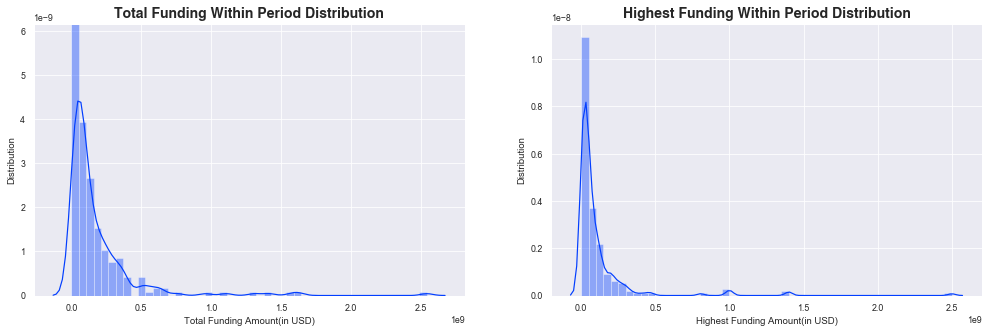

In [47]:
fig, (ax0,ax1) = plt.subplots(figsize=(17, 5),nrows=1,ncols=2,sharey=False)
sns.set_palette('colorblind')
sns.set_context('paper')

sns.distplot(fd['Total Funding Amount(in USD)'], ax=ax0)
ax0.set(ylabel='Distribution')
ax0.set_title(label='Total Funding Within Period Distribution',fontsize=14,fontname='helvetica',fontweight='bold')

sns.distplot(fd['Highest Funding'], ax=ax1)
ax1.set(ylabel='Distribution',xlabel='Highest Funding Amount(in USD)')
ax1.set_title(label='Highest Funding Within Period Distribution',fontsize=14,fontname='helvetica',fontweight='bold')

# sns.relplot(y='Total Funding Amount(in USD)',x='Start Date',data=fd,kind='line',ax=ax2)
# ax2.set(title='Time Series',ylabel='Total Funding')

plt.show()

### Let's plot Fundings throughout the years
Seems like there are some spikes in funding in early to mid 2017

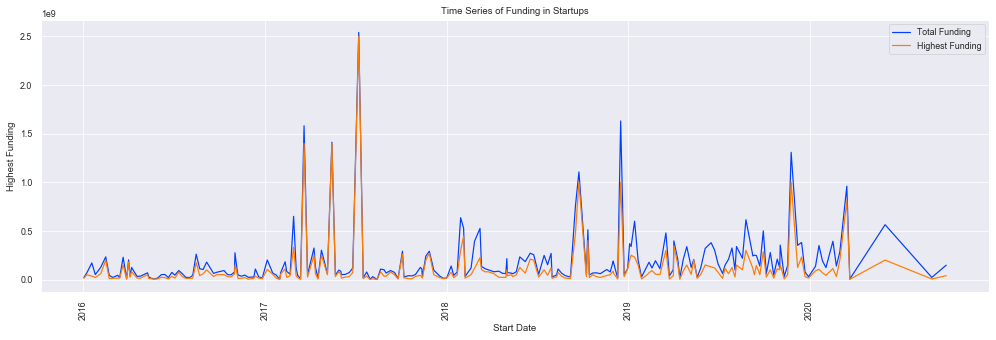

In [49]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.set_palette('colorblind')
sns.set_style('darkgrid')

sns.lineplot(y='Total Funding Amount(in USD)',x='Start Date',data=fd,ax=ax,label='Total Funding')
sns.lineplot(y='Highest Funding',x='Start Date',data=fd,ax=ax,label='Highest Funding')
ax.set(title='Time Series of Funding in Startups')
plt.xticks(rotation=90)
plt.show()

### Let's see the cummulative total funding throughout the years
Here we can see those spikes becoming evident

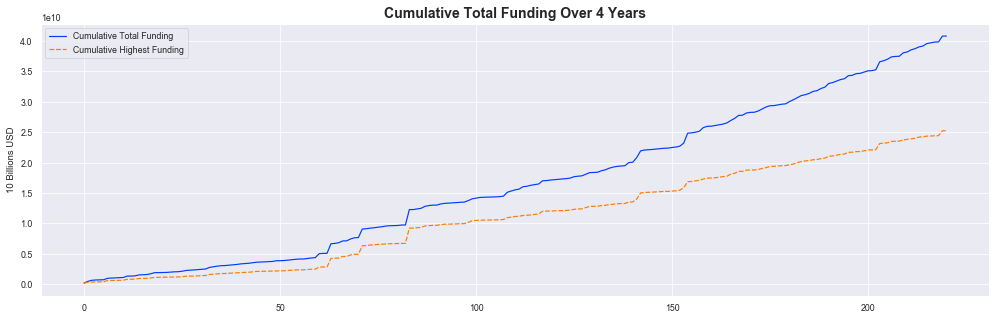

In [50]:
# Created new temporary dataframe, and 2 new variables (Cumulative Total Funding, Cumulative Highest Funding) 
temp = pd.DataFrame()
temp['Cumulative Total Funding'] = fd['Total Funding Amount(in USD)'].cumsum()
temp['Cumulative Highest Funding'] = fd['Highest Funding'].cumsum()
temp.index = fd.index
# Plot is really choppy when Start Date is used for the x-axis. So I opted to use the dataframe index

fig, ax = plt.subplots(figsize=(17,5))
sns.set_palette('colorblind')
sns.set_style('darkgrid')

sns.lineplot(data=temp)
ax.set(ylabel='10 Billions USD')
ax.set_title(label='Cumulative Total Funding Over 4 Years', fontsize=14, fontweight='bold')
plt.show()

### Let's plot Total Deals throughout the years
We can see a slight decrease in Total Deals from 2016 to mid 2018

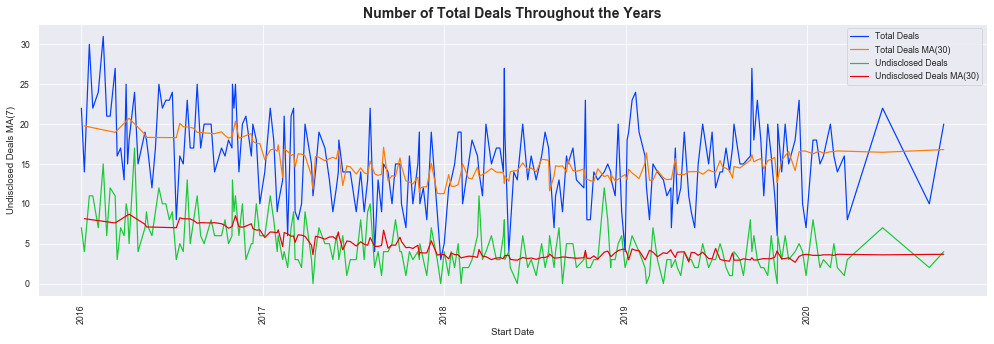

In [51]:
ma = pd.DataFrame()
ma['Start Date'] = fd['Start Date']
ma['Total Deals MA(7)'] = fd['Total Deals'].rolling(30).mean().shift(-3)
ma['Undisclosed Deals MA(7)'] = fd['Undisclosed Deals'].rolling(30).mean().shift(-3)

fig, ax = plt.subplots(figsize=(17, 5))
sns.set_palette('colorblind')
sns.set_style('darkgrid')

sns.lineplot(y='Total Deals',x='Start Date',data=fd,ax=ax,label='Total Deals')
sns.lineplot(y='Total Deals MA(7)',x='Start Date',data=ma,ax=ax,label='Total Deals MA(30)')

sns.lineplot(y='Undisclosed Deals',x='Start Date',data=fd,ax=ax,label='Undisclosed Deals')
sns.lineplot(y='Undisclosed Deals MA(7)',x='Start Date',data=ma,ax=ax,label='Undisclosed Deals MA(30)')

ax.set_title(label='Number of Total Deals Throughout the Years',fontsize=14,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

### Let's see the cumulative Total Deals throughout the years
The total number of deals seems to be more stable than the amount of funding

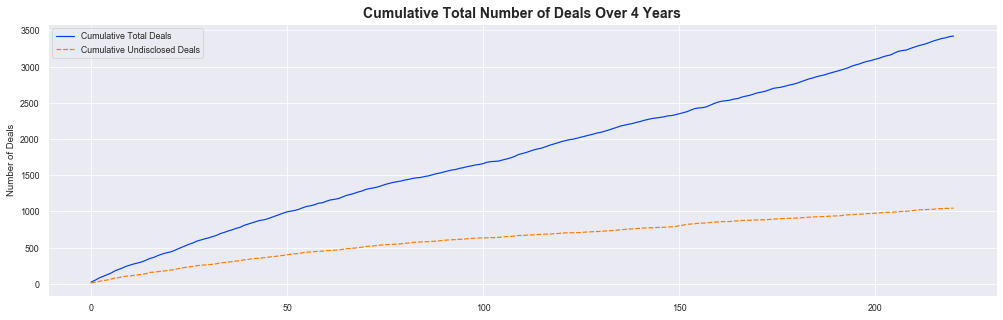

In [52]:
# Same process as the above just for Total Deals and Undisclosed Deals
temp = pd.DataFrame()
temp['Cumulative Total Deals'] = fd['Total Deals'].cumsum()
temp['Cumulative Undisclosed Deals'] = fd['Undisclosed Deals'].cumsum()
temp.index = fd.index

fig, ax = plt.subplots(figsize=(17,5))
sns.set_palette('colorblind')
sns.set_style('darkgrid')

sns.lineplot(data=temp,ax=ax)
ax.set(ylabel='Number of Deals')
ax.set_title(label='Cumulative Total Number of Deals Over 4 Years', fontsize=14, fontweight='bold')
plt.show()

### Let's see the correlation between factors
There does not seem to be any strong correlation between Total Deals and Total Fundings

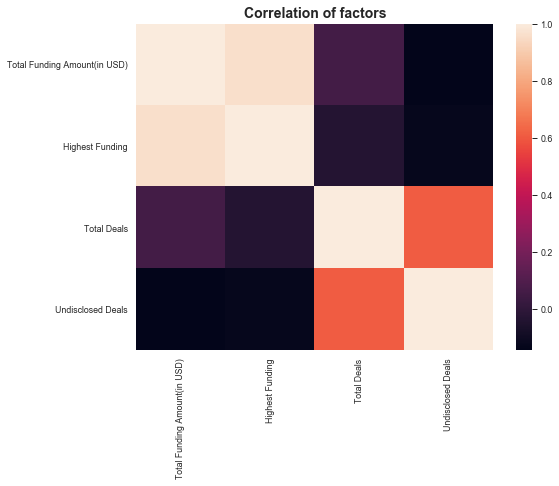

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(fd.iloc[:,:-1].corr())
ax.set_title('Correlation of factors',fontsize=14,fontweight='bold')
plt.show()

# Indian Unicorn EDA

In [16]:
iu = pd.read_csv('Indian_Unicorns.csv')
iu.head(10)

,Index,Company,Sector,Valuation,Entry,Location
0,1,Nykaa,E-Commerce,1.2,2020,Mumbai
1,2,BigBasket,Groceries,1.0,2019,Bangalore
2,3,Rivigo,Logistics Services,1.0,2019,Delhi NCR
3,4,Delhivery,Logistics Services,1.6,2019,Delhi NCR
4,5,Dream11,Gaming,1.1,2019,Mumbai
5,6,Druva Software,Enterprise Tech,1.0,2019,Pune
6,7,Ola Electric,Mobility,1.1,2019,Bangalore
7,8,Lenskart,E-Commerce,1.5,2019,Bangalore
8,9,Icertis,Enterprise Tech,1.0,2019,Pune
9,10,Citius Tech,Healthcare,1.0,2019,Mumbai


In [17]:
iu.shape

(34, 6)

In [18]:
iu.columns

Index(['Index', 'Company', 'Sector', 'Valuation', 'Entry', 'Location'], dtype='object')

In [19]:
iu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      34 non-null     int64  
 1   Company    34 non-null     object 
 2   Sector     34 non-null     object 
 3   Valuation  34 non-null     float64
 4   Entry      34 non-null     int64  
 5   Location   34 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.7+ KB


In [20]:
iu.describe()

,Index,Valuation,Entry
count,34.000000,34.000000,34.000000
mean,17.500000,3.665294,2017.029412
std,9.958246,4.454246,2.110368
min,1.000000,1.000000,2012.000000
25%,9.250000,1.100000,2015.250000
50%,17.500000,1.600000,2018.000000
75%,25.750000,3.500000,2019.000000
max,34.000000,21.000000,2020.000000


In [21]:
iu.nunique()

Index        34
Company      34
Sector       15
Valuation    20
Entry         9
Location      5
dtype: int64

In [22]:
fd.isnull().sum().sort_values(ascending=False)

Start Date                      0
End Date                        0
Total Funding Amount(in USD)    0
HF-Startup name                 0
Highest Funding                 0
Total Deals                     0
Undisclosed Deals               0
Year                            0
dtype: int64

### Let's plot the number of a startup in a sector
It seems that E-Commmerce, Enterprise Tech and Fintech is the favorite choice

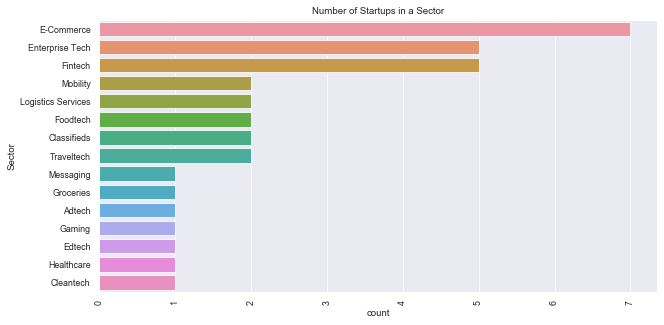

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(y='Sector',data=iu,ax=ax,order=iu['Sector'].value_counts().index)
ax.set(title='Number of Startups in a Sector')
plt.xticks(rotation=90)
plt.show()

### Let's plot the median valuation by sectors
it seems that Edtech has the highest median valuation

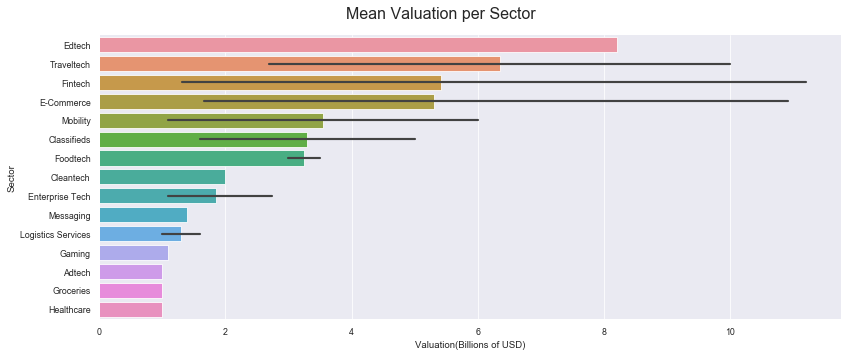

In [31]:
result = iu.groupby(["Sector"])['Valuation'].aggregate(np.mean).reset_index().sort_values('Valuation',ascending=0)

g = sns.catplot(data=iu,kind='bar',y='Sector',x='Valuation',order=result['Sector'], estimator=np.mean)
g.fig.set_size_inches(15,5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Valuation per Sector', fontsize=16, x=0.6)

plt.xlabel('Valuation(Billions of USD)')
plt.show()

### Let's plot the number of a startup in a Location
It seems that Delhi NCR and Bangalore has the most startups in the dataset

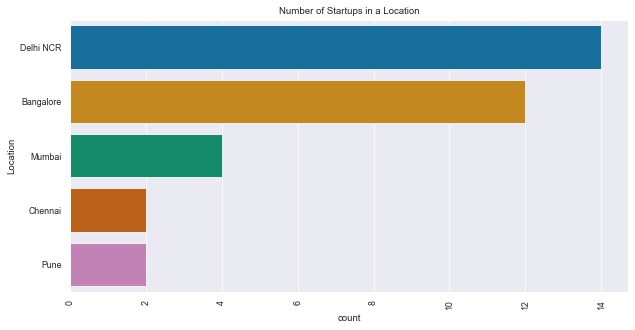

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(y='Location',data=iu,ax=ax,order=iu['Location'].value_counts().index)
ax.set(title='Number of Startups in a Location')
plt.xticks(rotation=90)
plt.show()

### Let's plot the median valuation by location
It seems startups in Chennai has the highest median valuation

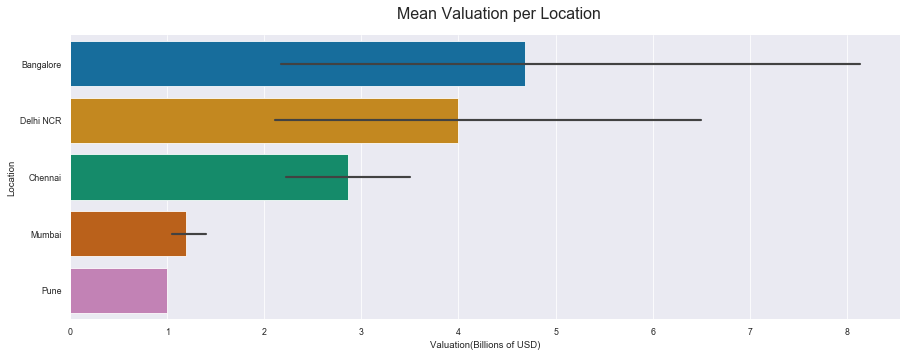

In [45]:
result = iu.groupby(["Location"])['Valuation'].aggregate(np.mean).reset_index().sort_values('Valuation',ascending=0)

g = sns.catplot(data=iu,kind='bar',y='Location',x='Valuation',order=result['Location'], estimator=np.mean)
g.fig.set_size_inches(15,5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Valuation per Location', fontsize=16, x=0.6)

plt.xlabel('Valuation(Billions of USD)')
plt.show()

### Let's plot the number of startups entering by year
It seems that 2018 and 2019 is a really busy year

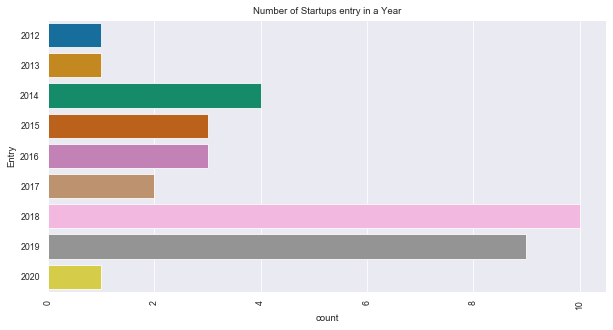

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(y='Entry',data=iu,ax=ax)
ax.set(title='Number of Startups entry in a Year')
plt.xticks(rotation=90)
plt.show()